<a href="https://colab.research.google.com/github/maryamxasghari/Deep-Learning/blob/main/Project_CNN__SVHN_Project_Learner_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition

**Marks: 30**

Dear Learner,

Welcome to project on Classification using Convolutional Neural Networks. We will work with the same dataset that we used for the Neural Network project: Street View Housing Numbers image dataset.

Do read the problem statement and the guidelines around the same.

----
### Context: 
-------

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

---------
### Objective:
------------
The objective of the exercise is to perform an image classification exercise on the given dataset to come up with a model that can help identify the digit images which have issues like picture brightness, blurriness. 

--------
### More about the dataset
------------
- The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

---------------------------
### Guidelines
-----------------------------------------
- Note that some of the questions are similar to the ones asked in the previous project. Semi filled codes are not provided in those cases.
- You need to download the dataset from the given link and add it to your drive. Use colab for this exercise. 
- You will need to mount the drive and give proper path to read the dataset.
- The exercise consists of semi written code blocks. You need to fill the blocks as per the instructions to achieve the required results.
- To be able to complete the assessment in the expected time, do not change the variable names. The codes might throw errors when the names are changed. 
- The marks of each requirement is mentioned in the question.
- You can raise your issues on the discussion forum on the Olympus.
- Uncomment the code snippets and work on them
--------------------------------------------
Wishing you all the best!





### Mount the drive
Let us start by mounting the drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


### Load the dataset
- Let us now, load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [4]:
import h5py
import numpy as np

# Open the file as readonly
# Make changes in path as required
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

Let us import the required libraries now.

In [7]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Visualising images (1.5 marks)
- Use X_train to visualise the first 10 images. (1 marks)
- Use Y_train to print the first 10 labels (0.5 mark)

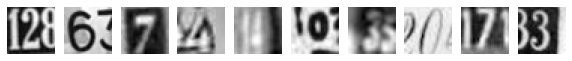

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [8]:
# visualizing the first 10 images in the dataset and their labels
# Your code here

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
for i in range(10):
     plt.subplot(1, 10, i+1)
     plt.imshow(X_train[i], cmap="gray")
     plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

### Data preparation (6 marks)

- Print the first image in the train image and figure out the shape of the images (0.5 mark)
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape (3 marks)
- Normalise the train and the test dataset by dividing by 255. (1 mark)
- Print the new shapes of the train and the test set. (0.5 mark)
- One hot encode the target variables (1 marks)

Shape: (32, 32)

First image:
 AxesImage(54,36;334.8x217.44)


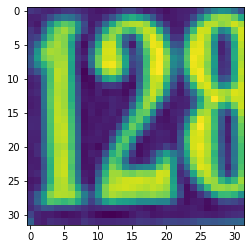

In [9]:
# Shape of the images and the first image
# Your code here

print("Shape:", X_train[0].shape)
print()
print("First image:\n", plt.imshow(X_train[0]))

In [10]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 3D data where there is just one channel

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [11]:
# Normalize inputs from 0-255 to 0-1

# Your code here

X_train = X_train/255
X_test =  X_test/255

In [12]:
# New shape 

#Your code here
print('Training set:', X_train.shape, y_train1.shape )
print('Test set:', X_test.shape, y_train1.shape )

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (42000,)


In [13]:
# one hot encode output
# Your code here
import keras
y_train = keras.utils.to_categorical(y_train1)
y_test = keras.utils.to_categorical(y_test1)

### Model Building (7 marks)
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with 16 filters and kernel size =3. Use the 'same' padding and provide apt input shape.
 - Add a leaky relu layer next with the value 0.1
 - First Convolutional layer with 32 filters and kernel size =3. Use the 'same' padding.
 - Another leakyRelu same as above.
 - A maxpooling layer with pool size of 2
 - Flatten the output from the previous layer
 - Add a dense layer with 32 nodes
 - Add a leakyRelu layer with slope(0.1)
 - Add the final output layer with nodes equal to the number of classes and softmax activation.
 - Compile the model with the categorical_crossentropy loss, adam optmizers (lr = 0.001) and accuracy metric.
- Do not fit the model here, just return the compiled model
- Call the model and print the model summary
- Fit the model on the train data with a validation split of 0.2, batch size = 32, verbose = 1 and 20 epochs. Store the model building history to use it later for visualisation.


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [15]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers

# Uncomment below to answer

def cnn_model_1():
     #Your code here
     model_1 = Sequential()
     model_1.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(32, 32, 1)))
     model_1.add(LeakyReLU(0.1))
     model_1.add(Conv2D(filters=32, kernel_size=3, padding='same'))
     model_1.add(LeakyReLU(0.1))
     model_1.add(MaxPooling2D(pool_size=2))
     model_1.add(Flatten())
     model_1.add(Dense(32))
     model_1.add(LeakyReLU(0.1))
     model_1.add(Dense(10, activation='softmax'))
     # Compile model
     adam = keras.optimizers.Adam(lr=1e-3)
     model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
     return model_1

In [16]:
# Call the function and print the model summary
model_1 = cnn_model_1()
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

In [17]:
# Fit the model and save the history

history_model_1 = model_1.fit(X_train, y_train,
            epochs=20,validation_split=0.2,batch_size = 32,
            validation_data=(X_test, y_test),
            shuffle=True,
            verbose=1)

Epoch 1/20
1050/1050 [==============================] - 4s 4ms/step - loss: 1.1162 - accuracy: 0.6382 - val_loss: 0.6294 - val_accuracy: 0.8168
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.5414 - accuracy: 0.8426 - val_loss: 0.5356 - val_accuracy: 0.8456
Epoch 3/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.4441 - accuracy: 0.8682 - val_loss: 0.4637 - val_accuracy: 0.8690
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3864 - accuracy: 0.8861 - val_loss: 0.4465 - val_accuracy: 0.8737
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3367 - accuracy: 0.9007 - val_loss: 0.4576 - val_accuracy: 0.8704
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2981 - accuracy: 0.9110 - val_loss: 0.4526 - val_accuracy: 0.8743
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2673 - accuracy: 0.9198 - val_loss: 0.4515 - val_accuracy:

### Plotting the validation and training accuracies (1.5 marks)

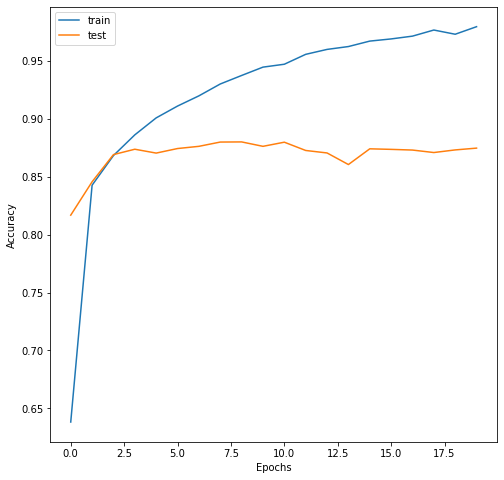

In [27]:
# plotting the accuracies
# Your code here

dict_hist = history_model_1.history
#list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(dict_hist['accuracy'])
plt.plot(dict_hist['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

** bold textComments**


### Iteration 2 (12 marks)
- Experiment with adding dropout layers to make the model generalise better and report the results.
- Feel free to explore various architectures that can help you generalise better.
- Repeat all the steps done above and plot the results

In [39]:
# Uncomment below and complete

def cnn_model_2():
     # initialized a sequential model
      model_2 = Sequential()
     # Your code here
      model_2.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(32, 32, 1)))
      model_2.add(LeakyReLU(0.1))
      model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))
      model_2.add(LeakyReLU(0.1))
      model_2.add(MaxPooling2D(pool_size=2))
      model_2.add(Dropout(0.25))
      model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))
      model_2.add(LeakyReLU(0.1))
      model_2.add(Conv2D(filters=64, kernel_size=3, padding='same'))
      model_2.add(LeakyReLU(0.1))
      model_2.add(MaxPooling2D(pool_size=2))
      model_2.add(Dropout(0.25))
      model_2.add(Flatten())
      model_2.add(Dense(256))
      model_2.add(LeakyReLU(0.1))
      model_2.add(Dropout(0.5))
      model_2.add(Dense(10, activation='softmax'))
      # Compile model
      adam = keras.optimizers.Adam(lr=1e-3)
      model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
     
      return model_2

In [40]:
#Call the function and print model summary

#Your code here
model_2 = cnn_model_2()
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)       

In [41]:
# Fit the model
# Uncomment below and complete
# history_model_2 = model_2.fit()

history_model_2 = model_2.fit(X_train, y_train,
            epochs=20,validation_split=0.2,batch_size = 32,
            validation_data=(X_test, y_test),
            shuffle=True,
            verbose=1)

Epoch 1/20
1050/1050 [==============================] - 5s 5ms/step - loss: 1.1754 - accuracy: 0.5891 - val_loss: 0.4640 - val_accuracy: 0.8639
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.4826 - accuracy: 0.8503 - val_loss: 0.3685 - val_accuracy: 0.8926
Epoch 3/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3952 - accuracy: 0.8793 - val_loss: 0.3455 - val_accuracy: 0.9012
Epoch 4/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3419 - accuracy: 0.8940 - val_loss: 0.3127 - val_accuracy: 0.9100
Epoch 5/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3111 - accuracy: 0.9030 - val_loss: 0.3185 - val_accuracy: 0.9088
Epoch 6/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2811 - accuracy: 0.9116 - val_loss: 0.3060 - val_accuracy: 0.9140
Epoch 7/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2592 - accuracy: 0.9191 - val_loss: 0.2933 - val_accuracy:

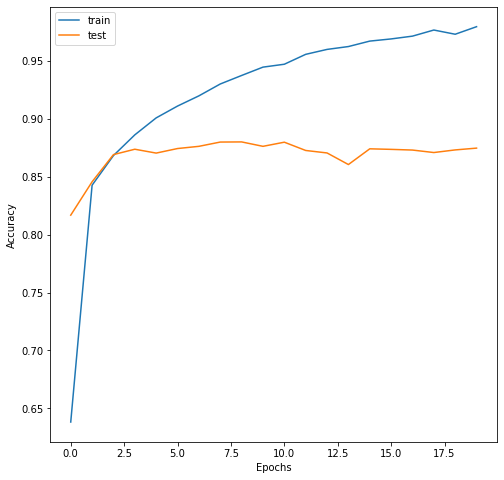

In [42]:
# plotting the accuracies
dict_hist2 = history_model_2.history
#list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(dict_hist['accuracy'])
plt.plot(dict_hist['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#### Comments:
For the 2nd model I increased number of layers, and number of trainable parameters increased significantly. The test shows higher accuracy.



### Test set prediction and final comments (Using the better model of the two iterations) (2 marks)
- predict on the test set and comment on the resultls obtained. (2 marks)


In [31]:
# predict on the test dataset
# Your code here

test_pred1 = np.argmax(model_1.predict(X_test), axis  = 1)

#Print the classificatio report
from sklearn.metrics import classification_report
print(classification_report(y_test1, test_pred1))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1814
           1       0.86      0.87      0.87      1828
           2       0.92      0.88      0.90      1803
           3       0.84      0.84      0.84      1719
           4       0.89      0.88      0.89      1812
           5       0.86      0.88      0.87      1768
           6       0.84      0.86      0.85      1832
           7       0.91      0.90      0.90      1808
           8       0.83      0.85      0.84      1812
           9       0.87      0.86      0.87      1804

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, test_pred1)

0.8726111111111111

In [43]:
test_pred2 = np.argmax(model_2.predict(X_test), axis  = 1)
print(classification_report(y_test1, test_pred2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1814
           1       0.91      0.93      0.92      1828
           2       0.94      0.95      0.94      1803
           3       0.90      0.91      0.91      1719
           4       0.93      0.95      0.94      1812
           5       0.94      0.93      0.93      1768
           6       0.94      0.91      0.93      1832
           7       0.95      0.93      0.94      1808
           8       0.92      0.92      0.92      1812
           9       0.94      0.91      0.93      1804

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000



In [44]:

accuracy_score(y_test1, test_pred2)

0.9306666666666666

#### **Comments**

accuracy of first model was 0.87 which is good.
The 2nd model shows improvement, and it has a better performance. The accuracy of second model increased to 0.93.
